In [79]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

param_grid = {
    "penalty": ["l1", "l2"], 
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "max_iter": [500, 750, 1000]
}
search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=5)

search.fit(X_train, y_train)
best_params = search.best_params_
model_tuned = LogisticRegression(**best_params)
model_tuned.fit(X_train, y_train)

with open("logistic-regression.pkl", "wb") as handle:
    pickle.dump(model_tuned, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model_tuned.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})", end="\n\n")

feature_weights = model_tuned.coef_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Top 20 features:")
print(feature_weights_mapping)


/Users/mhalaida/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mhalaida/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mhalaida/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  Fil

Accuracy: 90.13% (0.9012638965673905)

Top 20 features:
                feature    weight
109  global_alarm_count  0.333314
110     events_last_24h  0.301523
5        hour_windspeed  0.011842
3             hour_temp  0.006157
4           hour_precip  0.004972
1          day_datetime  0.003239
108           dvornikov  0.002905
55                lapin  0.002364
15                  men  0.001739
48                 mdco  0.001678
14                   ir  0.001571
24              nuclear  0.001505
83                 spac  0.001343
16                  lym  0.001215
82                soled  0.000662
39                 crit  0.000656
11               svatov  0.000636
17               shoigu  0.000595
86             kupyansk  0.000243
7       hour_cloudcover  0.000092


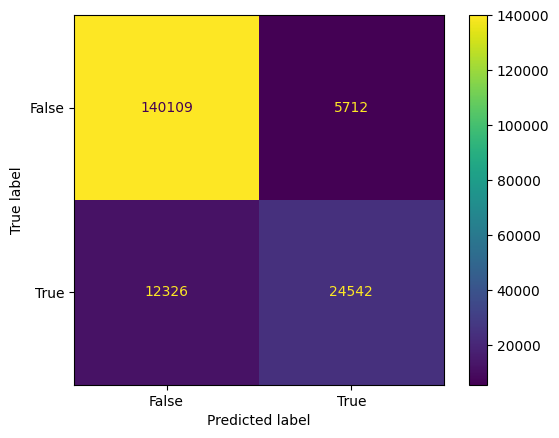

In [80]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_tuned.classes_)
disp.plot()
plt.show()